#Problem Statement
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and they want to understand the market before taking final decision.

Objective :Provide actionable insights to help XYZ firm in identifying the right company for making investments



Hypothesis                                                            
1.Which is the preferred payment mode of the company?          

2.Is there any relation between company and age?               

3.Is the gender different in different cities?                 
cities
4.Is there any relation between company and users              

5.Is there any relation between profits and payment_mode       

6.Are cities with high population have more users?             

7.is there any dependence between KM Travelled and Price Charged  


In [104]:
#importing libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
sns.set_color_codes()
%matplotlib inline

#setting up for customized printing
from IPython.display import Markdown, display
from IPython.display import HTML
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [105]:
#Reading the cab data
Cab_Data =pd.read_csv(r'C:\Users\Beyrylle\repos\DataSets\Cab_Data.csv')
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,01/08/16,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,01/06/16,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01/02/16,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,01/07/16,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,01/03/16,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [106]:
#dataframe general information
Cab_Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null object
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of Trip      359392 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [107]:
#Converting date object to datetime
Cab_Data['Date of Travel'] = pd.to_datetime(Cab_Data['Date of Travel'])
Cab_Data['Date of Travel'] 

0        2016-01-08
1        2016-01-06
2        2016-01-02
3        2016-01-07
4        2016-01-03
            ...    
359387   2018-01-08
359388   2018-01-04
359389   2018-01-05
359390   2018-01-05
359391   2018-01-02
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

In [108]:
#Numeric summary
Cab_Data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [109]:
#Reading the city dataframe
city =pd.read_csv(r'C:\Users\Beyrylle\repos\DataSets\City.csv',thousands=',')
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [110]:
#dataframe general information
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
City          20 non-null object
Population    20 non-null int64
Users         20 non-null int64
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [111]:
#changing users dtype to numeric
city["Users"] = pd.to_numeric(city["Users"])
city["Users"].head()

0    302149
1    164468
2    144132
3     17675
4     27247
Name: Users, dtype: int64

In [112]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [113]:
#Reading the customer dataframe
customer =pd.read_csv(r'C:\Users\Beyrylle\repos\DataSets\Customer_ID.csv')
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [114]:
# statistical summary for numeric columns
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [115]:
#Reading transaction dataset
transaction=pd.read_csv(r'C:\Users\Beyrylle\repos\DataSets\Transaction_ID.csv')
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [116]:
#Cab_Data and transaction columns both have a common column Transaction ID so we will join them 
cab_transaction = pd.merge(Cab_Data,
                 transaction,
                 on='Transaction ID', 
                 how='inner')

In [117]:
cab_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [118]:
cab_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
Transaction ID    359392 non-null int64
Date of Travel    359392 non-null datetime64[ns]
Company           359392 non-null object
City              359392 non-null object
KM Travelled      359392 non-null float64
Price Charged     359392 non-null float64
Cost of Trip      359392 non-null float64
Customer ID       359392 non-null int64
Payment_Mode      359392 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.4+ MB


In [119]:
#checking missing values 
cab_transaction.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

We have no missing values

In [120]:
#merging between the combination of transaction and Cab data with customer dataframe as they have customer id column
custcab_transaction =pd.merge(cab_transaction,
                           customer,
                           on ='Customer ID',
                           how ='inner')


In [121]:
custcab_transaction.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [122]:
custcab_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
Transaction ID        359392 non-null int64
Date of Travel        359392 non-null datetime64[ns]
Company               359392 non-null object
City                  359392 non-null object
KM Travelled          359392 non-null float64
Price Charged         359392 non-null float64
Cost of Trip          359392 non-null float64
Customer ID           359392 non-null int64
Payment_Mode          359392 non-null object
Gender                359392 non-null object
Age                   359392 non-null int64
Income (USD/Month)    359392 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [123]:
custcab_transaction.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [124]:
#merging the final dataset as they both have similar column
master_data =pd.merge(custcab_transaction,
                     city,
                     on='City',
                     how='inner'
                     )
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [125]:
#checking missing values
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

luckily we have no missing values

In [126]:
#checking if we have duplicates
master_data.duplicated().any()

False

In [127]:
#dropping unnecesary columns
master_data=master_data.drop(['Transaction ID', 'Customer ID'], axis=1)
master_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885,24701
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885,24701
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885,24701
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885,24701
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885,24701


In [128]:
#Variable identification
#we have to predict which company to invest in (pink cab or yellow cab)they are our target variables
#and remaiming columns will be Predictors(Input variables)
y = targets = labels = output_var = master_data["Company"]
X = predictors = input_var = master_data.loc[:,master_data.columns !="Company"]

In [129]:
# Print the Target and Input Variables
print("Input Variables", list(X.columns))
print("Output Variable", "['Company']")

Input Variables ['Date of Travel', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users']
Output Variable ['Company']


In [130]:
#datatype of the variables
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
Date of Travel        359392 non-null datetime64[ns]
Company               359392 non-null object
City                  359392 non-null object
KM Travelled          359392 non-null float64
Price Charged         359392 non-null float64
Cost of Trip          359392 non-null float64
Payment_Mode          359392 non-null object
Gender                359392 non-null object
Age                   359392 non-null int64
Income (USD/Month)    359392 non-null int64
Population            359392 non-null int64
Users                 359392 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [131]:

datatype = master_data.dtypes
#col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)


Categorical Columns : ['Company', 'City', 'Payment_Mode', 'Gender']
Numerical Columns : ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']


In [132]:
# discriptive statistics of numerical datatypes.
master_num =master_data.describe(include = ['float64','int64'])
master_num

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,22.567254,423.443311,286.190113,35.336705,15048.822937,3.132198e+06,158365.582267
std,12.233526,274.378911,157.993661,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,206.437500,151.200000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,22.440000,386.360000,282.480000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,32.960000,583.660000,413.683200,42.000000,21035.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,35000.000000,8.405837e+06,302149.000000


the minimum KM Travelled is 1 KM and maximum is 48km ,the majority of KM travelled ranged between 12 to 32 KM Average users of the cab is approximately 158,365 Avarage price charged is about 423 US dollars while cost of trip is 286 US dollars meaning some profits were made

In [187]:
master_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profits,Month,Year,Day,agerange
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885,24701,57.3150,1,2016,8,18-25
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885,24701,281.2772,7,2018,21,18-25
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885,24701,194.6480,11,2018,23,18-25
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885,24701,23.6660,1,2016,6,18-25
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885,24701,253.9808,4,2018,21,18-25


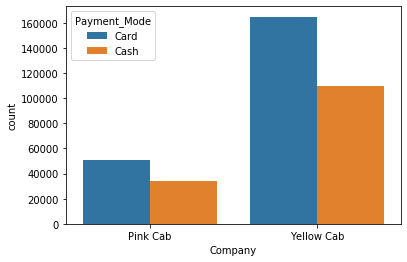

In [133]:
#which is the preffered payment mode of the company
sns.countplot(x ='Company',hue ='Payment_Mode',data =master_data)

Card Payment mode is the most frequentl used payment mode in both companies

State null hypothesis
H0 : Proportion of payment_mode are similar in both the Companies

State alternate hypothesis
H1 : Proportion of payment_modes are significantly different in different Companies



In [134]:
#Since Company and payment_mode are categorical columns, choosing Chi-Square test for testing

contigencytable = pd.crosstab(master_data['Company'],master_data['Payment_Mode'])
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contigencytable)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence ** Proportion of payment_modes are significantly different in different Companies**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **  Proportion of payment_mode are similar in both the Companies**', color='blue')

<span style='color:blue'>As the p_value **(0.5411981778304723) > 0.05**, we fail to reject Null Hypothesis. Hence **  Proportion of payment_mode are similar in both the Companies**</span>

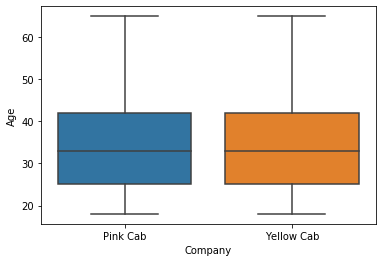

In [135]:
#is there any relation between company and age
sns.boxplot(x='Company', y='Age', data=master_data)

State null hypothesis

H0:Age of users of both companies are the same

H1:Age of pink Cab users is different from age of yellow cab users
    
    

In [136]:
#Split the age column into two parts between yellow cab and pink cab
import scipy.stats as stats
X = np.array(master_data[master_data.Company == 'Pink Cab'].Age) #pink cab
Y = np.array(master_data[master_data.Company == 'Yellow Cab'].Age) #yellow cab

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **age of pink cab users differ significantly from those of yellow cab**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **age of the users of both companies are the same**', color='blue')

<span style='color:blue'>As the p_value **(0.7056016582376317) > 0.05**, we fail to reject Null Hypothesis. Hence **age of the users of both companies are the same**</span>

In [137]:
#is the gender different in different cities


State null hypothesis¶
H0 : Proportion of gender are similar in both the cities
    
State alternate hypothesis¶
H1 : Proportion of gender are significantly different in different cities

In [139]:
#Since gender and city are categorical columns, choosing Chi-Square test for testing

contigencytable = pd.crosstab(master_data['Gender'],master_data['City'])
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contigencytable)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of gender are significantly different in different cities**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence ** Proportion of gender are similar in both the cities**', color='blue')

<span style='color:blue'>As the p_value **(0.0) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of gender are significantly different in different cities**</span>

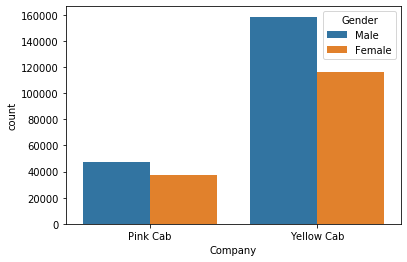

In [141]:
#Is gender different in different companies
sns.countplot(x ='Company',hue ='Gender',data =master_data)

State null hypothesis
H0 : Proportion of gender are similar in both the companies

State alternate hypothesis
H1 : Proportion of Gender are significantly different in different Companies

In [142]:
#Since gender and Company are categorical columns, choosing Chi-Square test for testing

contigencytable = pd.crosstab(master_data['Gender'],master_data['Company'])
chi_sq_Stat, p_value, deg_freedom, exp_freq =  stats.chi2_contingency(contigencytable)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of Gender are significantly different in different Companies**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **Proportion of gender are similar in both the companies**', color='blue')

<span style='color:blue'>As the p_value **(3.982674650131372e-25) < 0.05**, we reject the Null Hypothesis. Hence **Proportion of Gender are significantly different in different Companies**</span>

male are the leading users in both companies closely followed by female

In [143]:
#users by company in the city
#city_df = master_data.groupby('City').count().reset_index()[['City', 'Users','Company']]
city_df = master_data.groupby(['City','Company'])['Users'].count().reset_index()[['City', 'Users','Company']]
city_df.columns = ['City', 'Users','Company']
city_df = city_df.sort_values('Users', ascending=False)

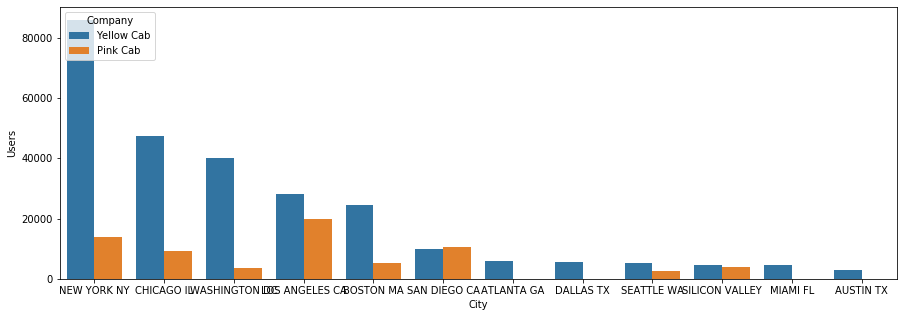

In [144]:
plt.figure(figsize=(15,5))
sns.barplot(x='City', y='Users',hue ='Company',data=city_df.head(20))
plt.show()

New York city has the most users with approximately 100000 users,Chicago comes at a distant second with around 58000 followed by Los Angeles 
Yellow cab seems to be leading in the amount of users it has

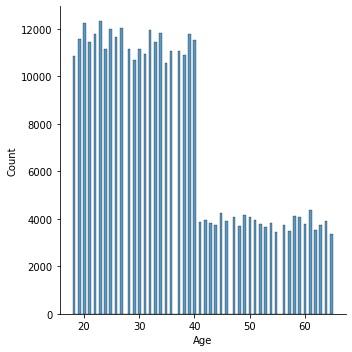

In [145]:
#Age distribution
sns.displot(x ='Age',data =master_data)

the distribution is skewed to the right
majority of the people are approximately age 19 to 40

In [146]:

from scipy.stats import spearmanr
corr, p  = spearmanr(master_data.Age, master_data.Users)



print('p-value is ', p)
print('corr is ', corr)

p-value is  0.11688615393908787
corr is  -0.002615511679660432



Our p-value > 0.05. It means, that we can reject  H0  and we can not conclude that a significant difference exists.

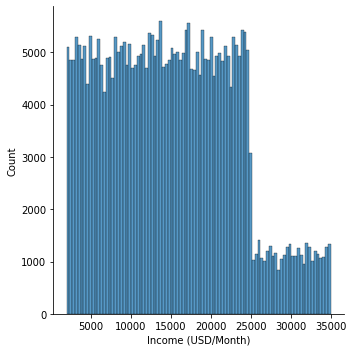

In [147]:
#income distribution
sns.displot(x ='Income (USD/Month)',data =master_data)

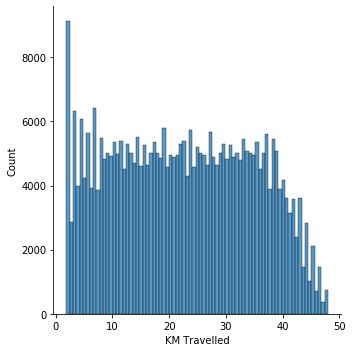

In [148]:
#income distribution
sns.displot(x ='KM Travelled',data =master_data)

Km Travelled has a symetric distribution

#Hypothesis under numerical variables
1.Are cities with high population have more users?
2.is there any dependence between users and income?
3.is there any dependence between users and Age?
4.is there any dependence between KM Travelled and Price Charged
5.is there any dependence between Month and Users

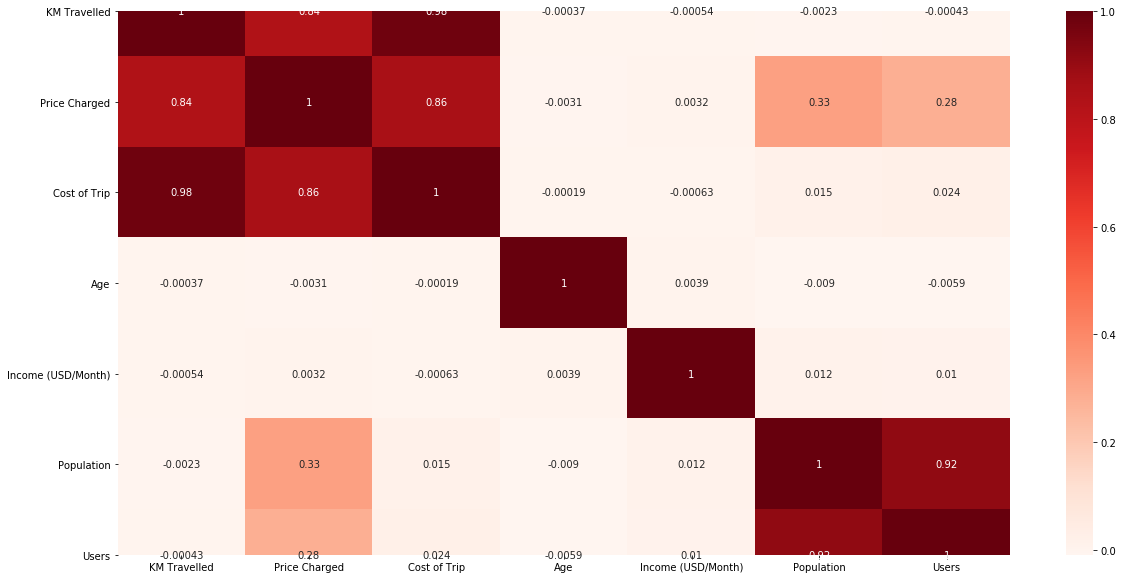

In [150]:
#correlation matrix
master_data.corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
plt.figure(figsize=(20,10))
sns.heatmap(master_data.corr(method='pearson'), annot=True, cmap = 'Reds')
plt.show()

Population and users are positively correlated

price charged and KM Travelled are also correlated -the more KM Travelled the higher the Price Charged

month ,year and day are negatively correlated with profits

Month and users are slightly correlated

income and users have no correlation

In [151]:
#introducing profits column
master_data['Profits']=master_data['Price Charged']-master_data['Cost of Trip']
master_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profits
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Card,Male,28,10813,814885,24701,57.3150
1,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Cash,Male,28,10813,814885,24701,281.2772
2,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Card,Male,28,10813,814885,24701,194.6480
3,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Card,Male,27,9237,814885,24701,23.6660
4,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Card,Male,27,9237,814885,24701,253.9808


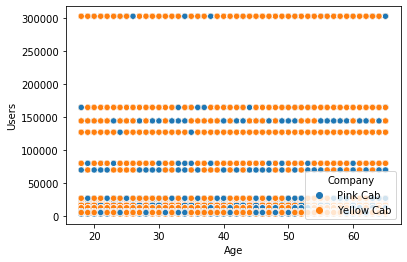

In [152]:
#which company makes the highest profits
sns.scatterplot(data =master_data,x ='Age',y='Users',hue='Company');

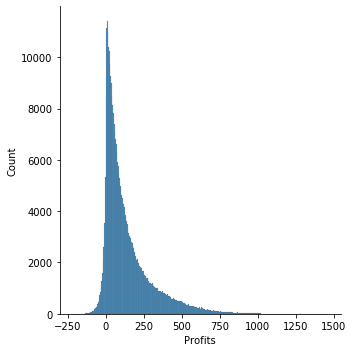

In [153]:
sns.displot(x ='Profits',data =master_data)

the distribution is skewed to the right
we have companies that make losses as shown in the graph

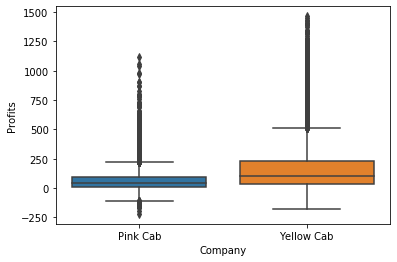

In [154]:
#company and profits
sns.boxplot(x ='Company',y ='Profits',data =master_data)

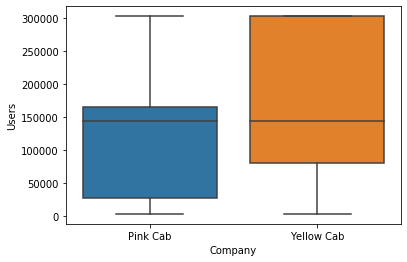

In [155]:
#is there any relation between company and users
sns.boxplot(x ='Company',y ='Users',data =master_data)

State null hypothesis
H0 : users of pink Cab are similar to that of Yellow Cab

State alternate hypothesis
H1 : users of Pink Cab are significantly different from that of Yellow Cab

In [156]:
#Split the company column into two parts between yellow cab and pink cab

X = np.array(master_data[master_data.Company == 'Yellow Cab'].Users) 
Y = np.array(master_data[master_data.Company == 'Pink Cab'].Users)

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **users of Pink Cab are significantly different from that of Yellow Cab**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **users of pink Cab are similar to that of Yellow Cab**', color='blue')

<span style='color:blue'>As the p_value **(0.0) < 0.05**, we reject the Null Hypothesis. Hence **users of Pink Cab are significantly different from that of Yellow Cab**</span>

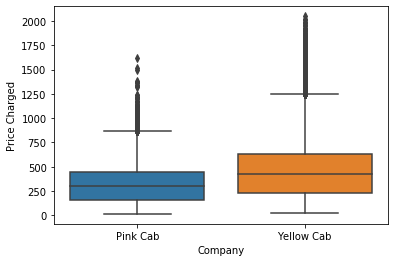

In [157]:
# is company and price charged different
sns.boxplot(x ='Company',y ='Price Charged',data =master_data)

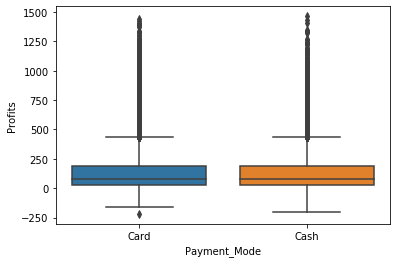

In [158]:
# is payment mode and users different
sns.boxplot(x ='Payment_Mode',y ='Profits',data =master_data)

State null hypothesis H0 : profits earned using both cash and card are same

State alternate hypothesis H1 : profits earned by both cash and card are significantly different

In [159]:
#Split the company column into two parts between yellow cab and pink cab

X = np.array(master_data[master_data.Payment_Mode == 'Card'].Profits)
Y = np.array(master_data[master_data.Payment_Mode == 'Cash'].Profits)

#executing the independent t-test to run tests on single variable
t_stat, p_value = stats.ttest_ind(X,Y)

# Setting our significance level at 5%
if p_value < 0.05:  
    printmd(f'As the p_value **({p_value}) < 0.05**, we reject the Null Hypothesis. Hence **profits earned by both cash and card are significantly different**', color='blue')
else:
    printmd(f'As the p_value **({p_value}) > 0.05**, we fail to reject Null Hypothesis. Hence **profits earned using both cash and card are same**', color='blue')

<span style='color:blue'>As the p_value **(0.4454195660215321) > 0.05**, we fail to reject Null Hypothesis. Hence **profits earned using both cash and card are same**</span>

In [160]:
master_data.columns

Index(['Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged',
       'Cost of Trip', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)',
       'Population', 'Users', 'Profits'],
      dtype='object')

In [161]:
#create a separate month and date column

master_data['Month'] =master_data['Date of Travel'].dt.month
master_data['Year'] =master_data['Date of Travel'].dt.year
master_data['Day'] =master_data['Date of Travel'].dt.day

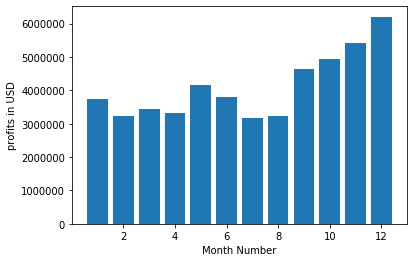

In [162]:
#visualizing it
months =range(1,13)#for x axis
results =master_data.groupby('Month').sum()
plt.bar(months,results['Profits'])

plt.ylabel('profits in USD')
plt.xlabel('Month Number')
plt.show()

december has the highest profits made
the 7th month had a major drop in profits

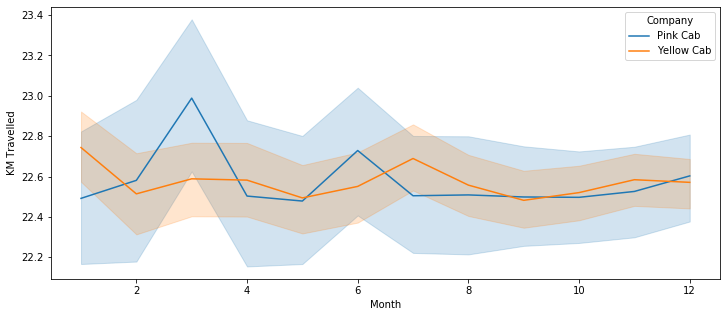

In [163]:
#montly km travel by both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Month", y="KM Travelled", hue="Company")

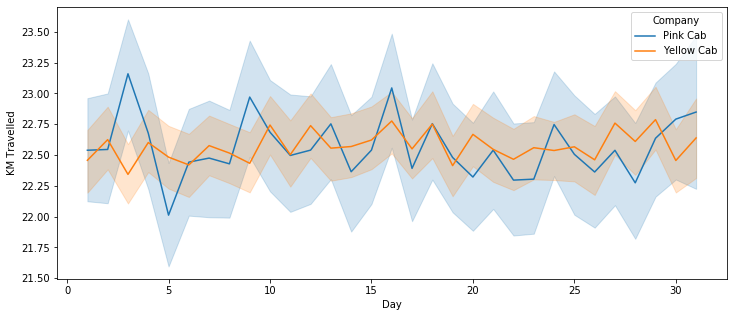

In [164]:
#daily km travel by both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Day", y="KM Travelled", hue="Company")

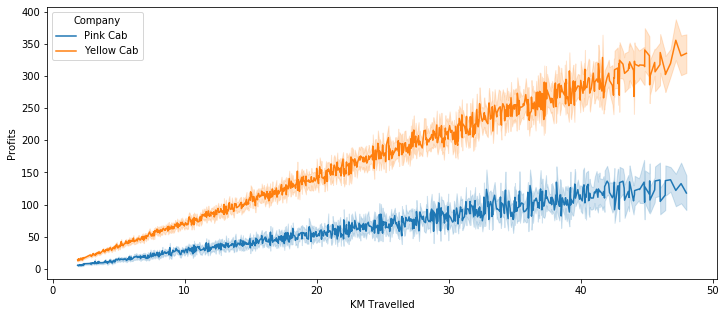

In [165]:
#profit per km travel   by both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="KM Travelled", y="Profits", hue="Company")

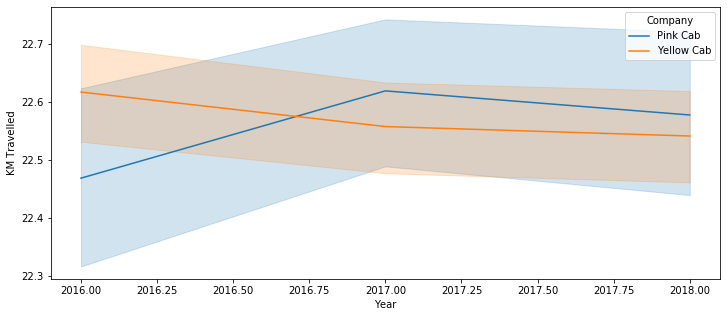

In [166]:
#yearly km travel by both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Year", y="KM Travelled", hue="Company")

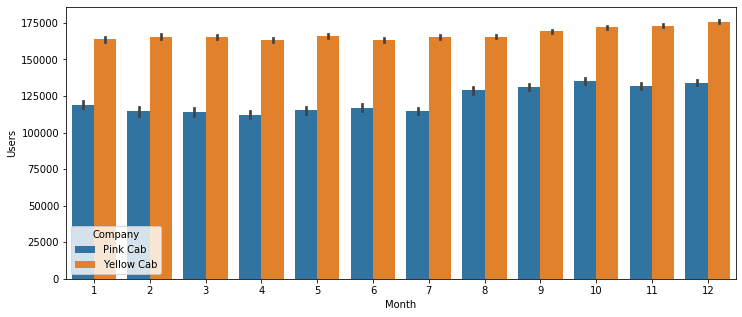

In [167]:
#month and users
plt.figure(figsize=(12, 5))
sns.barplot(data=master_data, x="Month", y="Users", hue="Company")

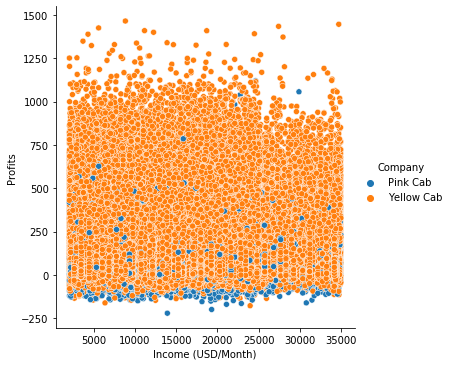

In [169]:
#Income Profits
sns.relplot(x="Income (USD/Month)", y="Profits", hue="Company",data =master_data)

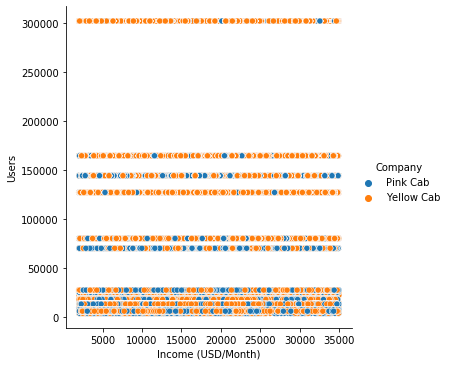

In [170]:
#income users analysis
sns.relplot(x="Income (USD/Month)", y="Users", hue="Company",data =master_data)

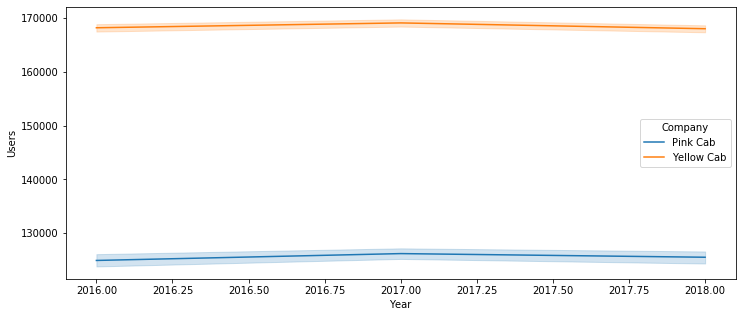

In [171]:
#users analysis yearly
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Year", y="Users", hue="Company")

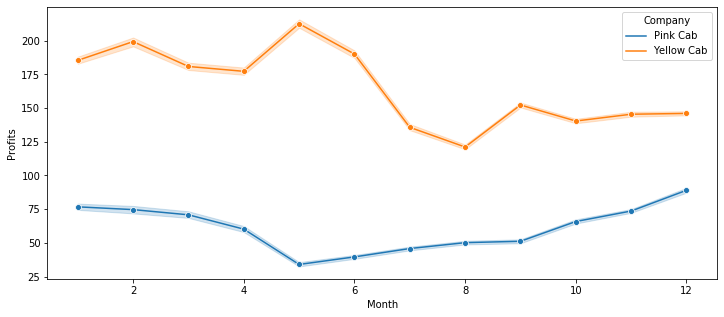

In [172]:
#Monthly profits for both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Month", y="Profits", hue="Company",marker='o')

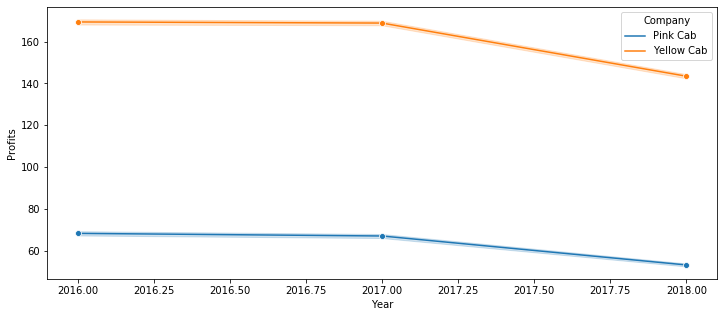

In [173]:
#Yearly profits for both companies
plt.figure(figsize=(12, 5))
sns.lineplot(data=master_data, x="Year", y="Profits", hue="Company",marker='o')

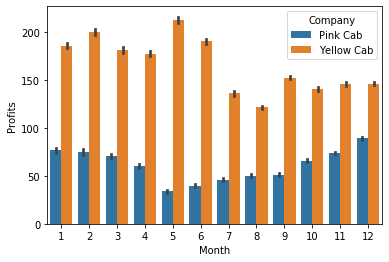

In [174]:
sns.barplot(x='Month',y='Profits',hue ='Company',data=master_data)

the 5th month has the highest profits

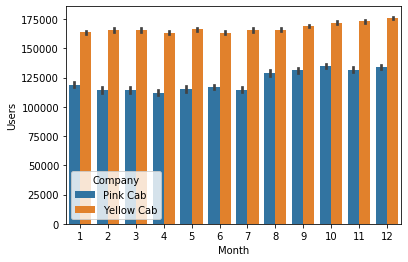

In [176]:
sns.barplot(x='Month',y='Users',hue ='Company',data=master_data)

the 12th month has the highest number of users and the 6 th month has lowest number of uses

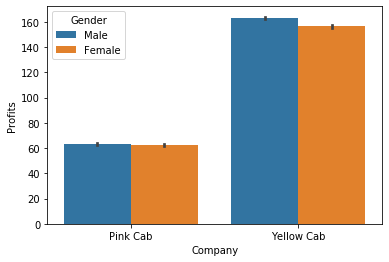

In [177]:
#Gender profit
sns.barplot(x='Company',y='Profits',hue ='Gender',data=master_data)

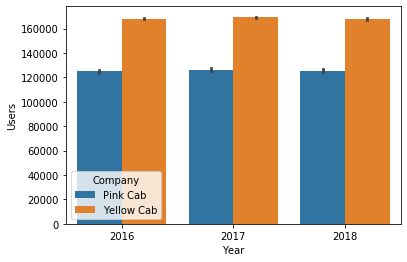

In [178]:
#Yearly Users
sns.barplot(x='Year',y='Users',hue ='Company',data=master_data)

In [179]:
#New column for Age Range

bins = [18, 30, 40, 50, 60, 70]
labels = ['18-25', '26-40', '41-60', '50-59', '60+']
master_data['agerange'] = pd.cut(master_data.Age, bins, labels = labels,include_lowest = True)
 

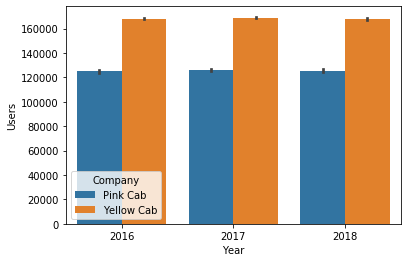

In [180]:
sns.barplot(x='Year',y='Users',hue ='Company',data=master_data)

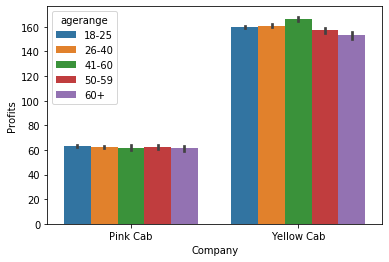

In [181]:
#Age and profit analysis
sns.barplot(x='Company',y='Profits',hue ='agerange',data=master_data)

agerange 18-25 earns the Yellow Cab company with more profits

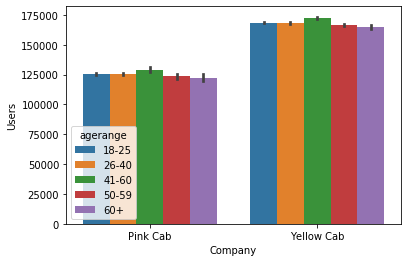

In [182]:
#age and user analysis
sns.barplot(x='Company',y='Users',hue ='agerange',data=master_data)

 Findings

Company - Yellow Cab company has more users than pink cab
        - Yellow Cab has wide coverage in cities
        - Yellow Cab has make more profits as they  charge at a higher price
        - Both companies have almost the same amount of females and males
    
Seasons - price charged are negatively correlated with months ,days and years for example its is 5 th month that has lowest users 
        yet it has the highest profits while month of November to december has largest numbers of users with thea least profits
    
    Thus i recommend Yellow cab as it makes the highest profits ,has highest number of users
        